In [1]:
import os

os.chdir("../")

In [2]:
%pwd

'c:\\Users\\anike\\OneDrive\\Desktop\\Ishant gupta class\\Facial_recognition_cnn\\Facial_recog_cnn'

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atulanandjha/lfwpeople")

print("Path to dataset files:", path)

c:\Users\anike\OneDrive\Desktop\Ishant gupta class\Facial_recognition_cnn\Facial_recog_cnn\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 232M/232M [00:12<00:00, 19.4MB/s] 

Extracting files...


Path to dataset files: C:\Users\anike\.cache\kagglehub\datasets\atulanandjha\lfwpeople\versions\3


In [ ]:
import shutil

In [5]:
os.makedirs("data/raw_data", exist_ok = True)

In [6]:
target_path = os.path.join("./data/", "raw_data")
shutil.move(path, target_path)

'./data/raw_data\\3'

In [7]:
import tarfile
import os

# Path to your .tgz file
tgz_path = 'data/raw_data/lfw-funneled.tgz'

# Destination directory to extract to
extract_dir = 'data/extracted_data'

# Ensure the directory exists
os.makedirs(extract_dir, exist_ok=True)

# Extract the .tgz archive
with tarfile.open(tgz_path, 'r:gz') as tar:
    tar.extractall(path=extract_dir)

print(f"Extracted to: {extract_dir}")

Extracted to: data/extracted_data


In [2]:
from sklearn.datasets import fetch_lfw_people

# Fetch the dataset; adjust min_faces_per_person if needed
lfw_people = fetch_lfw_people(min_faces_per_person=20, resize=0.4)
images = lfw_people.images  # Image data
labels = lfw_people.target  # Numeric labels
target_names = lfw_people.target_names  # Names corresponding to each label

print("Image shape:", images[0].shape)
print("Number of classes:", len(target_names))


Image shape: (50, 37)
Number of classes: 62


In [11]:
lfw_people

{'data': array([[0.2130719 , 0.34640524, 0.6156863 , ..., 0.075817  , 0.06797386,
         0.07843138],
        [0.28235295, 0.31895426, 0.27058825, ..., 0.03137255, 0.03006536,
         0.03006536],
        [0.07320262, 0.05882353, 0.04705882, ..., 0.17908497, 0.07843138,
         0.09673203],
        ...,
        [0.3385621 , 0.36078432, 0.26797387, ..., 0.9712418 , 0.9241831 ,
         0.9019608 ],
        [0.35555556, 0.28627452, 0.2771242 , ..., 0.39477125, 0.40261438,
         0.40130723],
        [0.34379086, 0.36862746, 0.48496732, ..., 0.1267974 , 0.15686275,
         0.15947713]], dtype=float32),
 'images': array([[[0.2130719 , 0.34640524, 0.6156863 , ..., 0.21045752,
          0.16993465, 0.12941177],
         [0.20261438, 0.46928108, 0.703268  , ..., 0.26013073,
          0.20522876, 0.14901961],
         [0.275817  , 0.5908497 , 0.7529412 , ..., 0.28104576,
          0.22091503, 0.15555556],
         ...,
         [0.26797387, 0.2771242 , 0.2875817 , ..., 0.05490197,
     

In [6]:
import cv2
import numpy as np

def check_and_resize_images(image_list, target_size=(64, 64)):
    """
    Processes a list of images: checks for corruption and resizes them.
    Logs any corrupted or missing images.
    """
    processed_images = []
    for idx, img in enumerate(image_list):
        if img is None or img.size == 0:
            print(f"Warning: Image at index {idx} is missing or corrupted. Skipping.")
            continue
        try:
            # Resize image
            resized_img = cv2.resize(img, target_size)
            processed_images.append(resized_img)
        except Exception as e:
            print(f"Error processing image at index {idx}: {e}")
    return np.array(processed_images)

# Process LFW images
clean_images = check_and_resize_images(images, target_size=(64, 64))
print(f"Processed images shape: {clean_images.shape}")


Processed images shape: (3023, 64, 64)


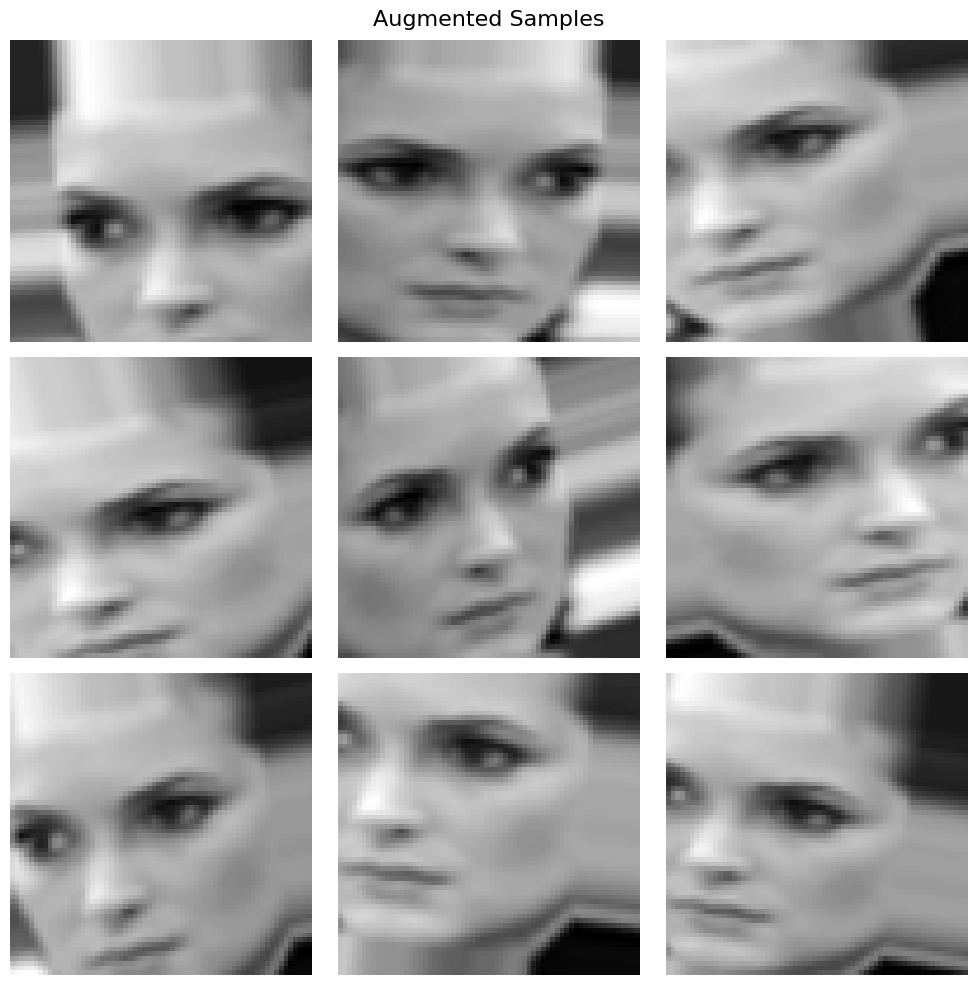

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Define augmentation configuration
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.15,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Visualize augmentation on a sample image
# Assuming clean_images is a numpy array with shape (n_samples, 64, 64)
sample_image = clean_images[0]  # shape is (64, 64)
# Add channel dimension for grayscale images: (64, 64) -> (64, 64, 1)
sample_image = np.expand_dims(sample_image, axis=-1)
# Add batch dimension: (64, 64, 1) -> (1, 64, 64, 1)
sample_image_batch = np.expand_dims(sample_image, axis=0)

plt.figure(figsize=(10, 10))
aug_iter = datagen.flow(sample_image_batch, batch_size=1)

for i in range(9):
    plt.subplot(3, 3, i + 1)
    batch = next(aug_iter)
    # Convert image from array to float32
    augmented_image = batch[0].astype('float32')
    # Remove channel dimension when displaying if needed
    plt.imshow(augmented_image.squeeze(), cmap='gray')
    plt.axis("off")

plt.suptitle("Augmented Samples", fontsize=16)
plt.tight_layout()
plt.show()
